# Elecciones USA 2020

## Datasets

### Cargar características socioeconómicas y demográficas

In [96]:
from tabulate import tabulate
import pandas as pd

# Cargar datos
all_data = pd.read_csv("data/county_complete.csv", header=0, sep=",")

# Seleccionar las primeras tres columnas y las columnas que contienen "2019"
all_data = all_data.iloc[:, [0, 1, 2]].join(all_data.loc[:, all_data.columns.str.contains("2019")])

# Renombrar la tercera columna
all_data.columns.values[2] = "county"

# Usar tabulate para mostrar las primeras 5 filas en formato de tabla
print(tabulate(all_data.head(), headers='keys', tablefmt='fancy_grid'))
print(len(all_data))

╒════╤════════╤═════════╤════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤══════════════╤════════════════════════╤══════════════════╤══════════════╤═════════════════╤════════════════════════════════╤═══════════════════════════════╤═════════════════════════════════╤═══════════════════╤══════════════════════════════════════════╤═════════════════════════════════════════╤═══════════════════════════════╤══════════════════════════════════════════════╤═════════════════════════════════╤═════════════════════════════╤════════════════════════════════════╤════════════════════════════════════╤════════════════╤══════════════════════════════╤═════════════════════════╤═══════════════════╤════════════════════════════════╤═════════════════════════════════╤════════════════════════════════════════════╤═══════════════╤══════════════════════════╤════════════════╤══════════════════════════╤══════════════════════════════╤════════════╤════════════════╤═══════

### Cargar los resultados electorales

In [97]:
# Cargar datos
d1 = pd.read_csv("data/2020_US_County_Level_Presidential_Results.csv")

# Crear nueva columna 'votes_others'
d1['votes_others'] = d1['total_votes'] - (d1['votes_gop'] + d1['votes_dem'])

# Quedarse con columnas específicas
d1 = d1[['state_name', 'county_fips', 'county_name', 'votes_gop', 'votes_dem', 'total_votes', 'votes_others', 'per_dem', 'per_gop']]

# Renombrar columnas
d1.columns = ["state", "fips", "county", "Trump_2020", "Biden_2020", "Total_2020", "Other_2020", "Perc_Biden_2020", "Perc_Trump_2020"]

# Usar tabulate para mostrar las primeras 5 filas en formato de tabla
print(tabulate(d1.head(), headers='keys', tablefmt='fancy_grid'))
print(len(d1))

╒════╤═════════╤════════╤════════════════╤══════════════╤══════════════╤══════════════╤══════════════╤═══════════════════╤═══════════════════╕
│    │ state   │   fips │ county         │   Trump_2020 │   Biden_2020 │   Total_2020 │   Other_2020 │   Perc_Biden_2020 │   Perc_Trump_2020 │
╞════╪═════════╪════════╪════════════════╪══════════════╪══════════════╪══════════════╪══════════════╪═══════════════════╪═══════════════════╡
│  0 │ Alabama │   1001 │ Autauga County │        19838 │         7503 │        27770 │          429 │         0.270184  │          0.714368 │
├────┼─────────┼────────┼────────────────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────────┼───────────────────┤
│  1 │ Alabama │   1003 │ Baldwin County │        83544 │        24578 │       109679 │         1557 │         0.22409   │          0.761714 │
├────┼─────────┼────────┼────────────────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────────┼───────────────────┤

### Unir dataset final

In [98]:
# Unir los dos datasets
data = pd.merge(d1, all_data, how='inner', on=["state", "county", "fips"])

# Ensure FIPS codes are strings with 5 characters (padded with leading zeros)
data['fips'] = data['fips'].astype(str).str.zfill(5)


# Usar tabulate para mostrar las primeras 5 filas en formato de tabla
print(tabulate(data.head(), headers='keys', tablefmt='fancy_grid'))
print(len(data))

╒════╤═════════╤════════╤════════════════╤══════════════╤══════════════╤══════════════╤══════════════╤═══════════════════╤═══════════════════╤════════════════════╤════════════════════╤════════════════════╤════════════════════╤══════════════╤════════════════════════╤══════════════════╤══════════════╤═════════════════╤════════════════════════════════╤═══════════════════════════════╤═════════════════════════════════╤═══════════════════╤══════════════════════════════════════════╤═════════════════════════════════════════╤═══════════════════════════════╤══════════════════════════════════════════════╤═════════════════════════════════╤═════════════════════════════╤════════════════════════════════════╤════════════════════════════════════╤════════════════╤══════════════════════════════╤═════════════════════════╤═══════════════════╤════════════════════════════════╤═════════════════════════════════╤════════════════════════════════════════════╤═══════════════╤══════════════════════════╤════════════

## Preprocesado

### Missing values

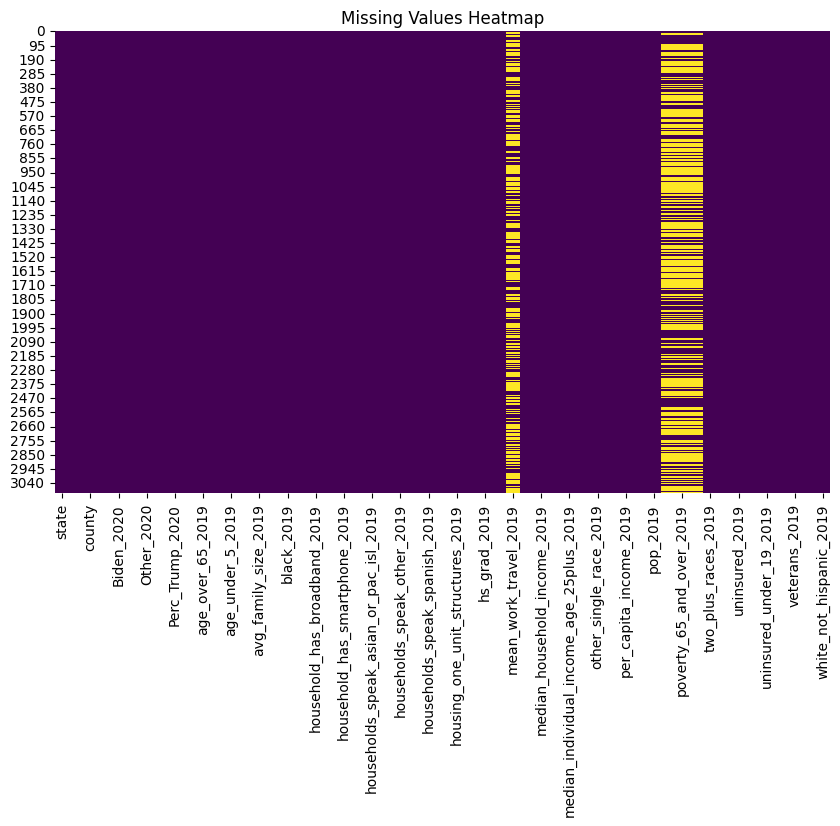

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize missing values with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")

plt.title("Missing Values Heatmap")
plt.show()

### Convertir variables categoricas en vectores

In [100]:
# Guardamos las variables en vectores para uso futuro
state_names = data['state']
fips_codes = data['fips']
county_names = data['county']


### Calcular el ganador en cada county

In [101]:
data['Winner_2020'] = data['Perc_Biden_2020'].apply(lambda x: "Biden" if x >= 0.50 else "Trump")

### Eliminar columnas

In [102]:
columns_to_drop = ['state', 'fips', 'county', 'Trump_2020', 'Perc_Trump_2020', 'age_over_85_2019', 'age_under_5_2019', 'household_has_broadband_2019', 'household_has_smartphone_2019', 'household_has_computer_2019', 'housing_mobile_homes_2019', 'housing_one_unit_structures_2019', 'housing_two_unit_structures_2019', 'mean_household_income_2019', 'mean_work_travel_2019', 'median_household_income_2019', 'median_individual_income_2019', 'median_individual_income_age_25plus_2019', 'persons_per_household_2019', 'poverty_65_and_over_2019', 'poverty_under_18_2019', 'uninsured_65_and_older_2019', 'uninsured_under_19_2019', 'uninsured_under_6_2019']  # Nombres de las columnas a eliminar
data = data.drop(columns=columns_to_drop)

### Tabla Final

In [103]:
# Usar tabulate para mostrar las primeras 5 filas en formato de tabla
print(tabulate(data.head(), headers='keys', tablefmt='fancy_grid'))

╒════╤══════════════╤══════════════╤══════════════╤═══════════════════╤════════════════════╤════════════════════╤══════════════╤════════════════════════╤══════════════════╤══════════════╤═════════════════╤═══════════════════╤══════════════════════════════════════════╤═════════════════════════════════════════╤═══════════════════════════════╤══════════════════════════════════════════════╤═════════════════════════════════╤════════════════╤═══════════════════╤═══════════════╤══════════════════════════╤════════════════╤══════════════════════════╤════════════╤════════════════╤═══════════════════════╤══════════════════════════╤══════════════════╤═════════════════╤══════════════╤═══════════════════════════╤═══════════════╕
│    │   Biden_2020 │   Total_2020 │   Other_2020 │   Perc_Biden_2020 │   age_over_18_2019 │   age_over_65_2019 │   asian_2019 │   avg_family_size_2019 │   bachelors_2019 │   black_2019 │   hispanic_2019 │   households_2019 │   households_speak_asian_or_pac_isl_2019 │   hous

### Correlación

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Supongamos que ya tienes un DataFrame 'data'
# Calcular la matriz de correlación
corr = data.iloc[:, :-1].corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5, annot_kws={"size": 8})

# Mostrar el gráfico
plt.show()


## Aprendizaje No Supervisado

### PCA

### Clustering

#### KMeans

## Aprendizaje Supervisado

En esta sección, utilizaremos métodos de aprendizaje supervisado para abordar nuestros problemas de clasificación y regresión. Para la clasificación, aplicaremos Árboles de Decisión, Random Forest, KNN, LDA/QDA, y Naive Bayes, comparando su desempeño. En regresión, emplearemos Regresión Lineal y Regresión Logística, con enfoques de selección de variables hacia adelante y hacia atrás, evaluando la eficacia de cada método en función del problema a resolver.

### Clasificación

#### Benchmark Model

#### Decision Trees

#### Random Forest

#### KNN

#### Análisis Discriminante

#### Naïve Bayes

### Regresión

#### Benchmark Model

#### Multiple Regression

#### Logistic Regression

## Mapas

In [70]:
import plotly.express as px

# Create a choropleth map using Plotly Express
fig = px.choropleth(data_frame=data,
                    geojson='https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json',
                    locations='fips',
                    color='Biden_2020',
                    hover_name='county',  # Show county names in hover tooltip
                    hover_data=['Trump_2020', 'Biden_2020'],
                    scope='usa',
                    color_continuous_scale="Blues_R",  # Use the custom scale
                    labels={'Biden_2020': 'Biden Votes'}  # Label for the color bar
                   )

# Add titles
fig.update_layout(title_text="2020 US Presidential Election - Biden Votes",  # Plot title
                  title_x=0.5,  # Center the title
                  geo=dict(
                      showcoastlines=True,  # Show coastlines
                      coastlinecolor="Black"  # Set coastline color
                  )
                 )

# Customize geographic display
fig.update_geos(
    fitbounds="locations",  # Fit the map to the FIPS code locations
)

# Remove the boundary lines between counties
fig.update_traces(marker_line_width=0.5, marker_line_color="black") 



fig.show()

